In [4]:
import os
print(os.getcwd())  
file_path = './M87_NEW.fits'
print(os.path.exists(file_path)) 

/drive/notebooks/PIANETI_STELLE_ETC
True


**Estrazione** file.fits , ho usato un file di M87 un buco nero che viene fornito dal sito ufficiale del Esa, se non estratto correttamente avra problemi di corruzione del file 

In [5]:
import numpy as np
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [6]:
hdu_list = fits.open('./M87_NEW.fits')
hdu_list.info()

Filename: ./M87_NEW.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (300, 300)   float32   


In [12]:
#se non estrapoli bene il file.fits avrai problemi di memory mapping:
from astropy.io import fits
with fits.open(file_path, memmap=False) as hdu_list:
    image_data = hdu_list[0].data

In [11]:
print(image_data)

[[3584. 3939. 3939. ... 3541. 3258. 3258.]
 [3584. 3655. 3655. ... 3258. 3258. 3116.]
 [3478. 3195. 3195. ... 3258. 3258. 3683.]
 ...
 [3378. 3095. 3095. ... 3504. 3645. 3645.]
 [3290. 3290. 3006. ... 3504. 3645. 3645.]
 [3573. 3573. 3006. ... 3504. 3645. 3645.]]


In [13]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(300, 300)


**Visualizzazione** dell'immagine estratta dl file

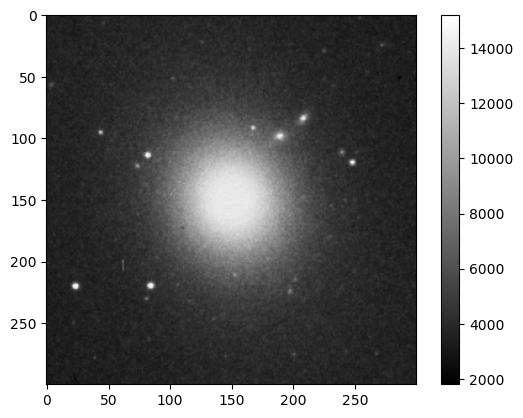

In [14]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [15]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 1814.0
Max: 15208.0
Mean: 4867.9062
Stdev: 2226.327


In [16]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

<class 'numpy.ndarray'>
(90000,)


**Visualizzazione** dell'immagine attraverso un **istogramma** dei valori dei pixel della tua immagine FITS, ed effettivamente corrisponde alla distribuzione dei livelli di luminosità o intensità dei pixel dell'immagine.

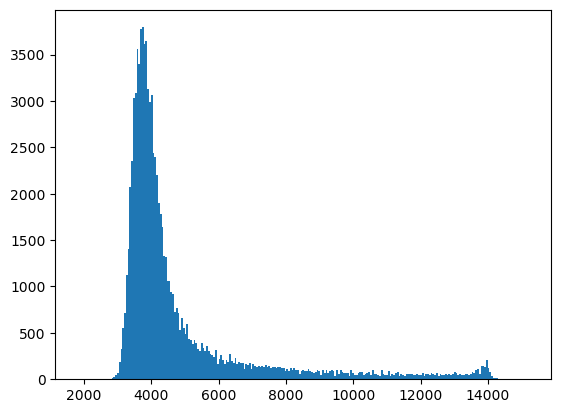

In [25]:
histogram = plt.hist(image_data.flatten(), bins='auto')